## In this exercise, the Pima Indian dataset is used to develop a Logistic Regression model to predict whether a patient has diabetes or not. Further, to check the model performance, Confusion Matrix, Accuracy and F1 Score are calculated.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [4]:
pima_dataset = pd.read_csv('diabetes.csv')
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Let us create separate dataframes for the input features and labels.
X = pima_dataset.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                        'DiabetesPedigreeFunction', 'Age']]
y = pima_dataset['Outcome']

In [6]:
#Next, train a Logistic regression model using the Sklearn linear model package. 
#Print the coefficient values of the trained model.

from sklearn import linear_model
model = linear_model.LogisticRegression(fit_intercept = True)

# Train Model
model.fit(X, y)

# Show model
print(model.coef_)

[[ 1.17252326e-01  3.35996269e-02 -1.40874324e-02 -1.27055067e-03
  -1.24030945e-03  7.72025744e-02  1.41904103e+00  1.00355604e-02]]


/Users/mymac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


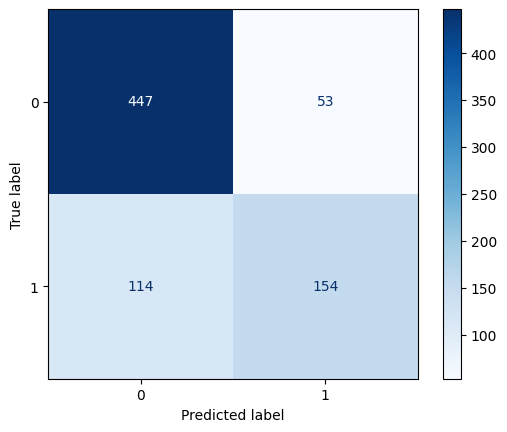

In [7]:
# Inspect the Confusion Matrix of the trained model. Confusion Matrix would show 4 values - 
# True Negatives, False Positive, False Negatives and True Positives.

y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred)

plt = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.plot(cmap = "Blues");

In [8]:
# Calculate the accuracy of the trained model using the Confusion Matrix values and compare it with 
# the accuracy generated from the internal function. Ideally, both accuracies should be the same.

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

accuracy = (TN + TP)/(TN + FP + FN + TP)
print(accuracy)

# Model Performance (Accuracy)
model.score(X, y)

0.7825520833333334


0.7825520833333334

In [9]:
# Finally, let us check the F1 Score performance metric of the trained model.

y_pred = model.predict(X)
f1 = f1_score(y_pred, y)
print(f1)

0.648421052631579


### In this exercise, you have learned to check the performance of the trained Classification model.